# No. 2

In [ ]:
zip_path = '/content/drive/My\ Drive/Images/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

replace /content/test/cat/14392.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

## Hyperparameter Tuning :

### rescale=1.0/255.0

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 50s 502ms/step - loss: 0.6836 - accuracy: 0.5906 - val_loss: 0.6079 - val_accuracy: 0.6976
Epoch 2/10
100/100 [==============================] - 48s 484ms/step - loss: 0.5816 - accuracy: 0.6950 - val_loss: 0.5474 - val_accuracy: 0.7145
Epoch 3/10
100/100 [==============================] - 49s 492ms/step - loss: 0.5115 - accuracy: 0.7495 - val_loss: 0.5204 - val_accuracy: 0.7411
Epoch 4/10
100/100 [==============================] - 49s 487ms/step - loss: 0.4614 - accuracy: 0.7809 - val_loss: 0.5029 - val_accuracy: 0.7598
Epoch 5/10
100/100 [==============================] - 48s 483ms/step - loss: 0.4162 - accuracy: 0.8070 - val_loss: 0.5206 - val_accuracy: 0.7504
Epoch 6/10
100/100 [==============================] - 48s 481ms/step - loss: 0.3658 - accuracy: 0.8377 - val_loss: 0.4692 - val_accuracy: 0.7846
Epoch 7/10
100/100 [==============================] - 

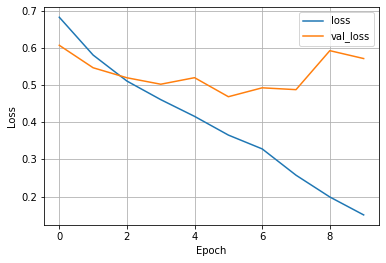

In [ ]:
plot_loss(history_base_model)

### width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True

In [ ]:
train_datagen1 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen1 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator1 = train_datagen1.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator1 = test_datagen1.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model1 = model.fit_generator(train_iterator1, steps_per_epoch=len(train_iterator1), validation_data=test_iterator1, validation_steps=len(test_iterator1), epochs=10)

Epoch 1/10
100/100 [==============================] - 132s 1s/step - loss: 0.4895 - accuracy: 0.7703 - val_loss: 0.4146 - val_accuracy: 0.8139
Epoch 2/10
100/100 [==============================] - 132s 1s/step - loss: 0.4352 - accuracy: 0.7987 - val_loss: 0.3960 - val_accuracy: 0.8193
Epoch 3/10
100/100 [==============================] - 132s 1s/step - loss: 0.4160 - accuracy: 0.8080 - val_loss: 0.3998 - val_accuracy: 0.8148
Epoch 4/10
100/100 [==============================] - 131s 1s/step - loss: 0.4058 - accuracy: 0.8149 - val_loss: 0.4032 - val_accuracy: 0.8175
Epoch 5/10
100/100 [==============================] - 132s 1s/step - loss: 0.3987 - accuracy: 0.8168 - val_loss: 0.4259 - val_accuracy: 0.8073
Epoch 6/10
100/100 [==============================] - 131s 1s/step - loss: 0.3875 - accuracy: 0.8294 - val_loss: 0.3641 - val_accuracy: 0.8370
Epoch 7/10
100/100 [==============================] - 132s 1s/step - loss: 0.3722 - accuracy: 0.8347 - val_loss: 0.3769 - val_accuracy: 0.8326

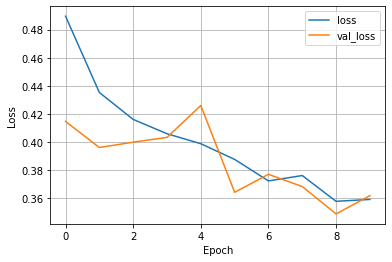

In [ ]:
plot_loss(history_base_model1)

### width_shift_range=0.1, height_shift_range=0.1, brightness_range=[0.2,1.0], horizontal_flip=True

In [ ]:
train_datagen2 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, brightness_range=[0.2,1.0], horizontal_flip=True)
test_datagen2 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator2 = train_datagen2.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator2 = test_datagen2.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model2 = model.fit_generator(train_iterator2, steps_per_epoch=len(train_iterator2), validation_data=test_iterator2, validation_steps=len(test_iterator2), epochs=10)

Epoch 1/10
100/100 [==============================] - 154s 2s/step - loss: 0.3913 - accuracy: 0.8257 - val_loss: 0.3624 - val_accuracy: 0.8375
Epoch 2/10
100/100 [==============================] - 152s 2s/step - loss: 0.3680 - accuracy: 0.8388 - val_loss: 0.3853 - val_accuracy: 0.8210
Epoch 3/10
100/100 [==============================] - 152s 2s/step - loss: 0.3565 - accuracy: 0.8405 - val_loss: 0.3635 - val_accuracy: 0.8433
Epoch 4/10
100/100 [==============================] - 152s 2s/step - loss: 0.3559 - accuracy: 0.8422 - val_loss: 0.3722 - val_accuracy: 0.8330
Epoch 5/10
100/100 [==============================] - 151s 2s/step - loss: 0.3499 - accuracy: 0.8488 - val_loss: 0.4156 - val_accuracy: 0.8202
Epoch 6/10
100/100 [==============================] - 151s 2s/step - loss: 0.3557 - accuracy: 0.8428 - val_loss: 0.3616 - val_accuracy: 0.8393
Epoch 7/10
100/100 [==============================] - 151s 2s/step - loss: 0.3370 - accuracy: 0.8530 - val_loss: 0.3648 - val_accuracy: 0.8486

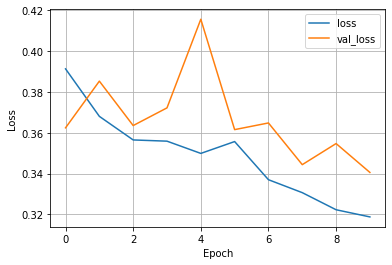

In [ ]:
plot_loss(history_base_model2)

### width_shift_range=0.4, height_shift_range=0.4, brightness_range=[0.2,1.0], zoom_range=[0.5,0.3], horizontal_flip=True

In [ ]:
train_datagen3 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.4, height_shift_range=0.4, brightness_range=[0.2,1.0], zoom_range=[0.5,0.3], horizontal_flip=True)
test_datagen3 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator3 = train_datagen3.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator3 = test_datagen3.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model3 = model.fit_generator(train_iterator3, steps_per_epoch=len(train_iterator3), validation_data=test_iterator3, validation_steps=len(test_iterator3), epochs=10)

Epoch 1/10
100/100 [==============================] - 153s 2s/step - loss: 0.6800 - accuracy: 0.5777 - val_loss: 0.5228 - val_accuracy: 0.7380
Epoch 2/10
100/100 [==============================] - 153s 2s/step - loss: 0.6458 - accuracy: 0.6163 - val_loss: 0.6154 - val_accuracy: 0.6758
Epoch 3/10
100/100 [==============================] - 153s 2s/step - loss: 0.6404 - accuracy: 0.6236 - val_loss: 0.5282 - val_accuracy: 0.7154
Epoch 4/10
100/100 [==============================] - 153s 2s/step - loss: 0.6368 - accuracy: 0.6309 - val_loss: 0.6262 - val_accuracy: 0.6234
Epoch 5/10
100/100 [==============================] - 152s 2s/step - loss: 0.6244 - accuracy: 0.6403 - val_loss: 0.5796 - val_accuracy: 0.6909
Epoch 6/10
100/100 [==============================] - 152s 2s/step - loss: 0.6214 - accuracy: 0.6490 - val_loss: 0.5755 - val_accuracy: 0.6772
Epoch 7/10
100/100 [==============================] - 152s 2s/step - loss: 0.6164 - accuracy: 0.6535 - val_loss: 0.5562 - val_accuracy: 0.7056

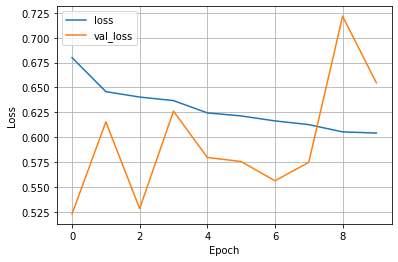

In [ ]:
plot_loss(history_base_model3)

### width_shift_range=0.3, height_shift_range=0.1, brightness_range=[0.2,1.0], horizontal_flip=True

In [ ]:
train_datagen21 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.3, height_shift_range=0.1, brightness_range=[0.2,1.0], horizontal_flip=True)
test_datagen21 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator21 = train_datagen21.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator21 = test_datagen21.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model21 = model.fit_generator(train_iterator21, steps_per_epoch=len(train_iterator21), validation_data=test_iterator21, validation_steps=len(test_iterator21), epochs=10)

Epoch 1/10
100/100 [==============================] - 155s 2s/step - loss: 0.4369 - accuracy: 0.7961 - val_loss: 0.3481 - val_accuracy: 0.8317
Epoch 2/10
100/100 [==============================] - 155s 2s/step - loss: 0.3940 - accuracy: 0.8197 - val_loss: 0.3370 - val_accuracy: 0.8535
Epoch 3/10
100/100 [==============================] - 155s 2s/step - loss: 0.3735 - accuracy: 0.8336 - val_loss: 0.3829 - val_accuracy: 0.8246
Epoch 4/10
100/100 [==============================] - 155s 2s/step - loss: 0.3728 - accuracy: 0.8354 - val_loss: 0.3606 - val_accuracy: 0.8433
Epoch 5/10
100/100 [==============================] - 158s 2s/step - loss: 0.3647 - accuracy: 0.8366 - val_loss: 0.3555 - val_accuracy: 0.8441
Epoch 6/10
100/100 [==============================] - 155s 2s/step - loss: 0.3588 - accuracy: 0.8401 - val_loss: 0.3196 - val_accuracy: 0.8588
Epoch 7/10
100/100 [==============================] - 155s 2s/step - loss: 0.3555 - accuracy: 0.8444 - val_loss: 0.3334 - val_accuracy: 0.8526

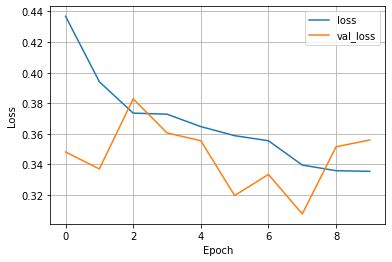

In [ ]:
plot_loss(history_base_model21)

### width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.2,1.0], horizontal_flip=True

In [ ]:
train_datagen22 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.2,1.0], horizontal_flip=True)
test_datagen22 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator22 = train_datagen22.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator22 = test_datagen22.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model22 = model.fit_generator(train_iterator22, steps_per_epoch=len(train_iterator22), validation_data=test_iterator22, validation_steps=len(test_iterator22), epochs=10)

Epoch 1/10
100/100 [==============================] - 157s 2s/step - loss: 0.4301 - accuracy: 0.7992 - val_loss: 0.3296 - val_accuracy: 0.8539
Epoch 2/10
100/100 [==============================] - 157s 2s/step - loss: 0.4084 - accuracy: 0.8158 - val_loss: 0.3449 - val_accuracy: 0.8486
Epoch 3/10
100/100 [==============================] - 156s 2s/step - loss: 0.3977 - accuracy: 0.8205 - val_loss: 0.3070 - val_accuracy: 0.8628
Epoch 4/10
100/100 [==============================] - 157s 2s/step - loss: 0.3959 - accuracy: 0.8217 - val_loss: 0.3172 - val_accuracy: 0.8610
Epoch 5/10
100/100 [==============================] - 156s 2s/step - loss: 0.3755 - accuracy: 0.8304 - val_loss: 0.3150 - val_accuracy: 0.8597
Epoch 6/10
100/100 [==============================] - 157s 2s/step - loss: 0.3826 - accuracy: 0.8301 - val_loss: 0.3156 - val_accuracy: 0.8601
Epoch 7/10
100/100 [==============================] - 157s 2s/step - loss: 0.3708 - accuracy: 0.8378 - val_loss: 0.3128 - val_accuracy: 0.8659

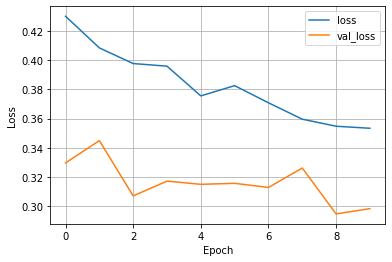

In [ ]:
plot_loss(history_base_model22)

### width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.5,1.0], horizontal_flip=True

In [ ]:
train_datagen23 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.5,1.0], horizontal_flip=True)
test_datagen23 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator23 = train_datagen23.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator23 = test_datagen23.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model23 = model.fit_generator(train_iterator23, steps_per_epoch=len(train_iterator23), validation_data=test_iterator23, validation_steps=len(test_iterator23), epochs=40)

Epoch 1/40
100/100 [==============================] - 156s 2s/step - loss: 0.3108 - accuracy: 0.8685 - val_loss: 0.2881 - val_accuracy: 0.8819
Epoch 2/40
100/100 [==============================] - 156s 2s/step - loss: 0.2974 - accuracy: 0.8750 - val_loss: 0.2704 - val_accuracy: 0.8806
Epoch 3/40
100/100 [==============================] - 156s 2s/step - loss: 0.2848 - accuracy: 0.8807 - val_loss: 0.2746 - val_accuracy: 0.8819
Epoch 4/40
100/100 [==============================] - 156s 2s/step - loss: 0.2920 - accuracy: 0.8772 - val_loss: 0.2752 - val_accuracy: 0.8863
Epoch 5/40
100/100 [==============================] - 156s 2s/step - loss: 0.2831 - accuracy: 0.8798 - val_loss: 0.2788 - val_accuracy: 0.8770
Epoch 6/40
100/100 [==============================] - 156s 2s/step - loss: 0.2798 - accuracy: 0.8791 - val_loss: 0.2919 - val_accuracy: 0.8726
Epoch 7/40
100/100 [==============================] - 156s 2s/step - loss: 0.2818 - accuracy: 0.8818 - val_loss: 0.2638 - val_accuracy: 0.8881

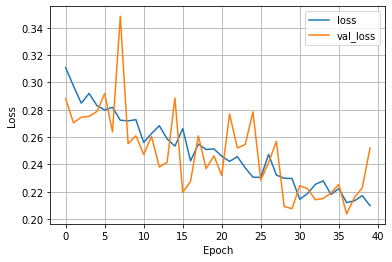

In [ ]:
plot_loss(history_base_model23)

In [ ]:
train_datagen23 = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.5,1.0], horizontal_flip=True)
test_datagen23 = ImageDataGenerator(rescale=1.0/255.0)

train_iterator23 = train_datagen23.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator23 = test_datagen23.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model23 = model.fit_generator(train_iterator23, steps_per_epoch=len(train_iterator23), validation_data=test_iterator23, validation_steps=len(test_iterator23), epochs=75)

Epoch 1/75
100/100 [==============================] - 155s 2s/step - loss: 0.2113 - accuracy: 0.9109 - val_loss: 0.2315 - val_accuracy: 0.9050
Epoch 2/75
100/100 [==============================] - 155s 2s/step - loss: 0.2014 - accuracy: 0.9167 - val_loss: 0.2110 - val_accuracy: 0.9152
Epoch 3/75
100/100 [==============================] - 154s 2s/step - loss: 0.2062 - accuracy: 0.9147 - val_loss: 0.2100 - val_accuracy: 0.9059
Epoch 4/75
100/100 [==============================] - 154s 2s/step - loss: 0.2060 - accuracy: 0.9161 - val_loss: 0.2174 - val_accuracy: 0.9112
Epoch 5/75
100/100 [==============================] - 153s 2s/step - loss: 0.2062 - accuracy: 0.9162 - val_loss: 0.2379 - val_accuracy: 0.8965
Epoch 6/75
100/100 [==============================] - 153s 2s/step - loss: 0.2045 - accuracy: 0.9159 - val_loss: 0.1999 - val_accuracy: 0.9201
Epoch 7/75
100/100 [==============================] - 153s 2s/step - loss: 0.2025 - accuracy: 0.9151 - val_loss: 0.2464 - val_accuracy: 0.8956

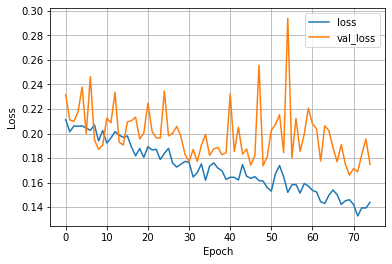

In [ ]:
plot_loss(history_base_model23)

## Kesimpulan

Arsitektur CNN yang digunakan adalah Deeper Layer CNN. Pada CNN tersebut dilakukan image augmentasi dan hyperparameter tuning. Ditemukan hasil terbaik pada hyperparameter :

rescale=1.0/255.0, width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.5,1.0], horizontal_flip=True

Dari hyperparameter tersebut, didapatkan val_loss yang konstan pada angka 0.17-0.30 dan validation accuracy 0.87-0.93, rentang yang didapat cukup dekat.

Dapat diambil kesimpulan bahwa dengan convolution layer yang lebih dalam, bisa mengambil feature yang lebih banyak lagi dari data-data hasil augmentasi. Dari hasil data yang augmentasi, kemampuan untuk melihat data yang belum pernah di lihat sebelumnya lebih baik.